# 5. 선형 회귀 모델 : 먼저 긋고 수정하기


## 선형 회귀
- 기울기 a와 오차 사이에는 이차함수의 관계가 있음
- 이차함수의 최솟값 즉, 기울기가 0인지점이 가장 오차가 작은 지점임
- 그걸 찾는 방법을 `경사 하강법`이라고 함
- `-` ,`+` 를 왔다갔다하며 기울기가 0인지점을 찾음
- 여기서 왔다갔다하는 크기를 `학습률`이라고 함
- `학습률`이 너무 크면 발산해버리고, 너무 작으면 찾는데 너무 오래걸림
-  딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는것은 중요한 최적화 과정중 하나임

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 데이터 준비

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

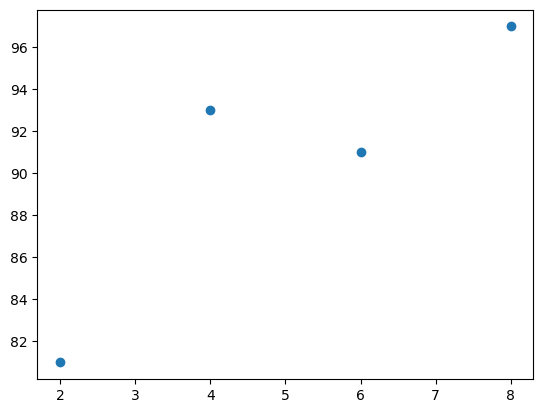

In [8]:
# 데이터 분포를 그래프로 확인 (matplotlib 사용)

plt.scatter(x,y) # 데이터의 분포를 나타냄
plt.show()

In [9]:
# 기울기 a, 절편 b값을 설정
a = 0
b = 0

# 학습률을 정함
# 학습률은 여러 학습률을 적용하며 찾아야함
# 즉, 모델을 돌릴 때마다 다르므로 그때그때 설정해야 함
# 자동으로 학습률을 찾아주는 알고리즘이 존재함
lr = 0.03

# 몇번 반복될지 설정
# 몇번 돌릴건지를 결정하는게 에폭(epochs)라고 함
epochs = 2001

In [10]:
# 경사 하강법
n = len(x)

for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))  

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


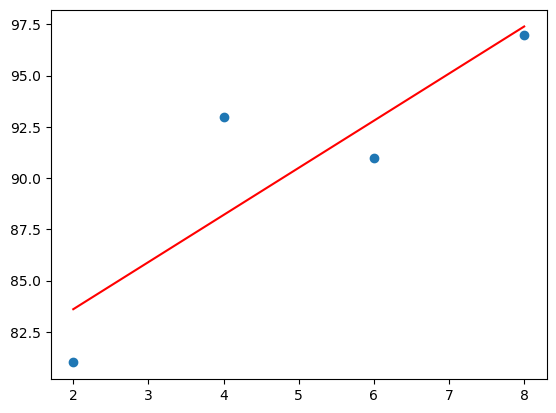

In [11]:
# 그래프 확인

y_pred = a * x + b

plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()

## 다중 선형 회귀

- 학생들의 성적정보를 학생들이 공부한 시간을 가지고 예측했음
- 근데 보니까 좀 다름
- 다른 요인들이 많이 작용하는데, 공부한 시간만을 가지고 계산해서 그럼
- 그러면 더 많이 변수들을 늘려야 하는데, 종속변수 y를 하나 두고 x1, x2 의 독립변수를 두면 다음과 같은 식이 나옴
- y = ax1 + bx2 + c
- 이거의 최적화된 모델을 구하는게 다중 선형 회귀임


In [12]:
# 데이터 준비
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([81,93,91,97])

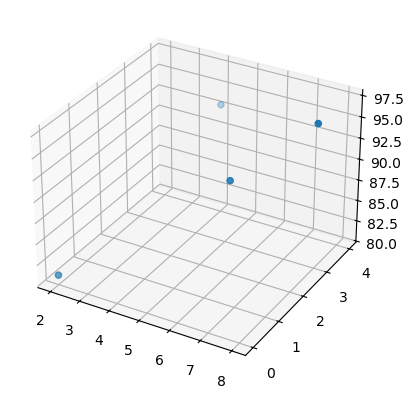

In [13]:
# 데이터 분포 확인
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(x1, x2, y) # 3차원으로 그림
plt.show()

In [14]:
# 실행을 위한 변수 설정
a1 = 0
a2 = 0
b = 0

# 학습률을 정함
lr = 0.01

ephocs = 2001

In [15]:
# 경사 하강법
n = len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))


epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [16]:
#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


## 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델

- y = ax + b 에서 머신러닝에서 부르는 용어가 다름
- H(x) = wx + b 에 대응됨
- `가설함수 = 가중치 * x + 편향` 으로 표현함
- 또한 평균 제곱 오차처럼 실제 값과 예측 값 사이의 오차를 구하는 식을 `손실함수`라고 함
- 경사 하강법 처럼 최적의 기울기와 절편을 찾기위한 방법을 `옵티마이저`라고 함

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
#x = np.array([2, 4, 6, 8]) # 선형회귀
# [공부시간, 과외시간] 의 2차원 배열
# attribute
x = np.array([[2,0],[4,4],[6,2],[8,3]])
# 그에따른 성적 결과
# class
y = np.array([81, 93, 91, 97]) 

In [19]:
model = Sequential()

# 출력값, 입력변수, 분석 방법에 맞게끔 모델을 설정함
# 가설함수는 h(x) = wx + b 임
# Dense(출력 개수, 입력 데이터의 차원, 활성화 함수)
# 입력된 값을 다음 층으로 넘길때 각 값을 어떻게 처리할지를 결정 - 활성화 함수

# 선형 회귀
#model.add(Dense(units=1, input_dim=1, activation="linear"))
# 다중 선형 회귀
# Dense : 완전 연결 층 (입력과 출력을 모두 연결함)
# units = 예측할 출력값이 1개 (여기서는 점수)
# input_dim = 입력값이 2개임 (여기서는 공부시간, 과외시간이 됨)
# activation = 활성화 함수임 여기서는 선형 활성화 함수를 사용해서 값을 그대로 전달함 (선형 회귀니까)
model.add(Dense(units=1, input_dim=2, activation="linear"))# 성적정보를 하나 넘길거임, 인풋이 되는 값은 2개가 될거임

# 오차 수정을 위해 경사하강법을, 오차 정도를 판단하기 위해 평균 제곱 오차를 사용함
# loss 를 구하는 방법은 mse 즉 평균 제곱 오차를 사용함
# 평균제곱 오차를 사용하는 이유는 - 값때문에 그럼
# 평균제곱 오차를 사용하기 때문에, 오차는 2차함수의 관계를 가진다고 할 수 있음
# 그래서 2차함수에서 최솟값을 찾기 위해 sgd (경사하강법) 경사를 내려가면서 최솟값을 구하는 방법을 사용하게 됨
model.compile(loss='mse', optimizer='sgd')#경사하강법 실행 : sgd, 손실함수 실행 : mse

#오차를 최소화하는 과정을 2000번 반복함
model.fit(x, y, epochs=2000,verbose=1)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 7737.7354

c:\Users\window11\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 7737.7354
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1405.9631
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 955.1822
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 918.0457
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 910.0355
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 904.1083
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 898.3621
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 892.6628
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 887.0006
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 881.3748
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 875.7851
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 870.2310
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 864.7126
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 859.2295
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step -

In [20]:
# plt.scatter(x,y)
# plt.plot(x, model.predict(x), 'r') # 여기서 'r'은 색상을 뜻함
# plt.show()

In [ ]:
import tensorflow as tf

#임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4 # 다중 선형회귀
#prediction = model.predict([hour]) #텐서플로 2.9.0 까지만 가능

#input_data = tf.constant([[hour]], type=tf.float32) # 텐서플로 버전업으로 인한 수정
input_data = tf.constant([[hour, private_class]]) # 텐서플로 버전업으로 인한 수정
#prediction = model.predict(input_data)[0][0]  # 텐서플로 버전업으로 인한 수정
prediction = model.predict(input_data)[0][0]

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7시간을 공부할 경우의 예상 점수는 97.53점입니다
